# Introduction 
This is a notebook to develop a SVM regressor model to predict california housing prices.

In [75]:
!uv pip install warnings

  × No solution found when resolving dependencies:                                  
  ╰─▶ Because warnings was not found in the package registry and you require
      warnings, we can conclude that the requirements are unsatisfiable.


In [76]:
# importing libraries
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import reciprocal, uniform

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.svm import LinearSVR, SVR

import warnings
from sklearn.exceptions import ConvergenceWarning

In [6]:
# fetch the data
cal_housing = fetch_california_housing(as_frame=True)

In [7]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
# convert to frame
cal_housing = cal_housing.frame

In [9]:
cal_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


All float values. (Might need to do scaling)

In [11]:
cal_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
cal_housing.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [13]:
cal_housing.iloc[1]

MedInc            8.301400
HouseAge         21.000000
AveRooms          6.238137
AveBedrms         0.971880
Population     2401.000000
AveOccup          2.109842
Latitude         37.860000
Longitude      -122.220000
MedHouseVal       3.585000
Name: 1, dtype: float64

From the above eda it is clear that the only variable with somewhat a category like structure is HouseAge which has only 52 different values in a 20k dataset

In [14]:
X = cal_housing.loc[:, ~cal_housing.columns.isin(["MedHouseVal"])]
y = cal_housing["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

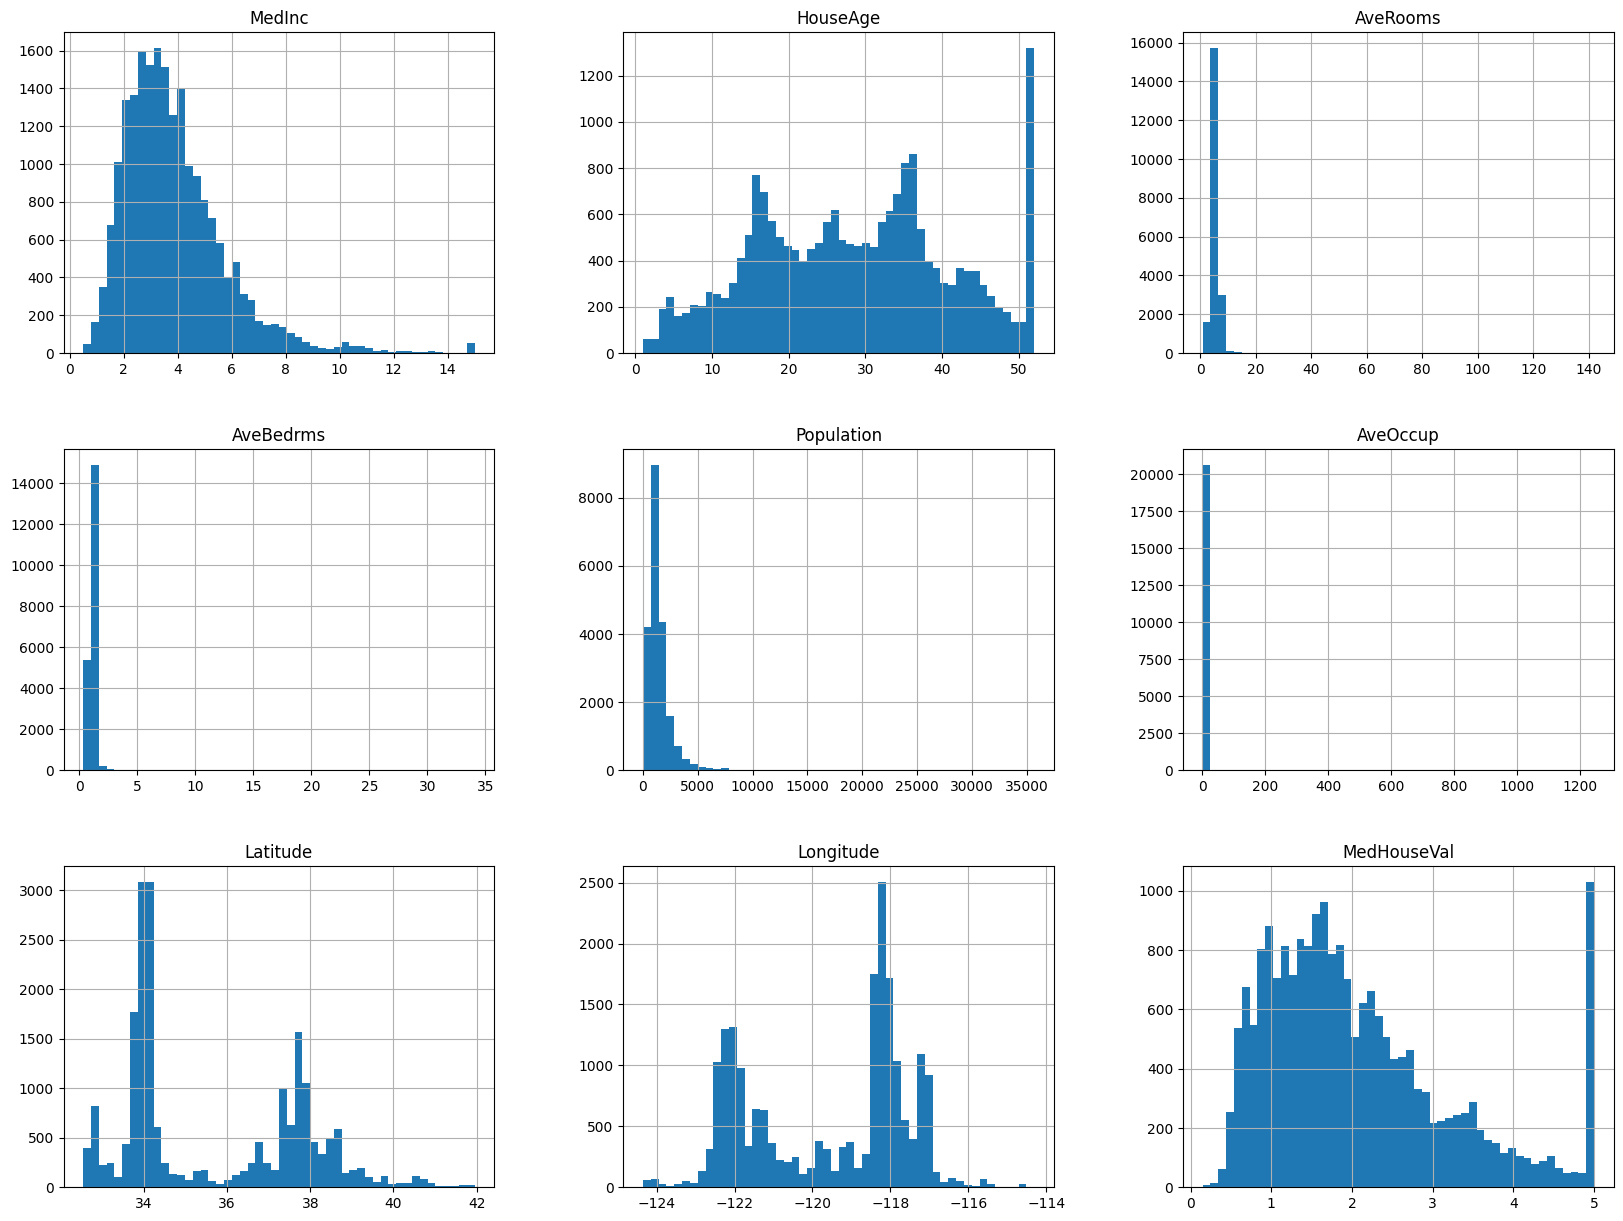

In [16]:
# plotting data distribution graphs
cal_housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [17]:
# plotting a map to showcase the housing values in different parts of cal
# Create a map centered at a specific location

my_map = folium.Map(
    # map will be centered around california since thats where the data was collected from
    location=[37.775, -122.4194],
    zoom_start=10,
    tiles="Cartodb Positron",
)

locations = cal_housing[["Longitude", "Latitude", "MedHouseVal"]].values.tolist()
for loc in locations:
    # calculated actual values to make it easier for the user to read them when checking the map
    loc[2] = loc[2] * 100000
    color = "green" if loc[2] < 150000 else "orange" if loc[2] < 250000 else "red"
    folium.Marker(
        location=[loc[1], loc[0]],
        popup=f"House value: ${loc[2]}",
        icon=folium.Icon(color=color),
    ).add_to(my_map)

For the time being we are not doing any feature scaling. this will happen in later sections 

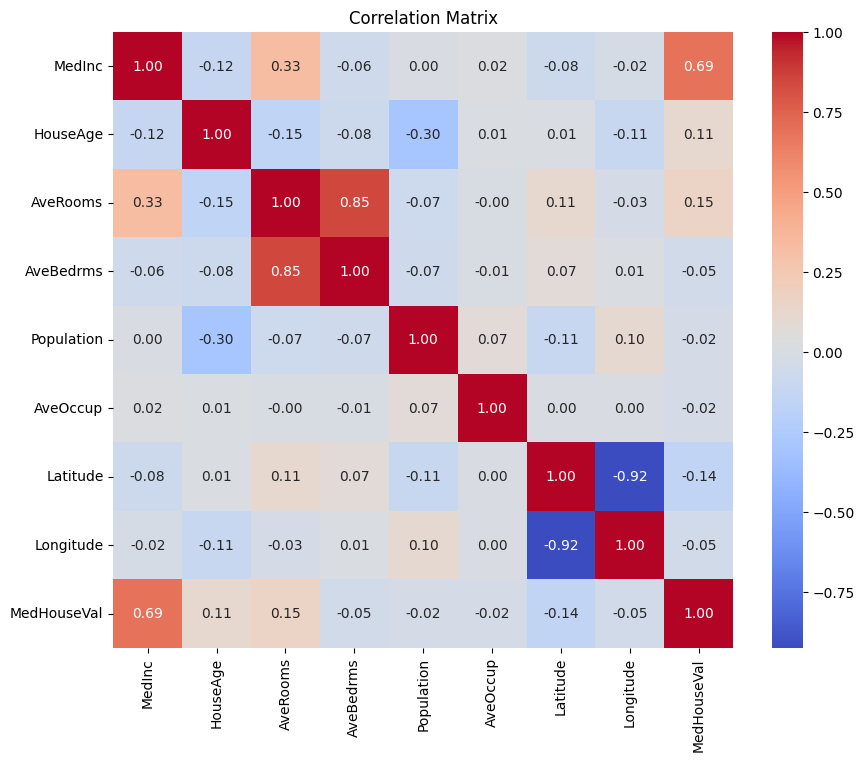

In [20]:
# correlation analysis
correlation_matrix = cal_housing.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Model Building 

In [63]:
# scaled data
# Assuming 'data' is your DataFrame containing the dataset
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
scaled_X_train = scaler.transform(X_train)

# Transform the test data
scaled_X_test = scaler.transform(X_test)

## Model trained on data with coordinates

In [64]:
svm_reg = LinearSVR(epsilon=1.5, max_iter=1000000)
svm_reg.fit(scaled_X_train, y_train)

/Users/shariqmalik/Documents/svm_experiments/svm_model_1/svm_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5, max_iter=1000000)

## Evaluating the model 

In [65]:
predictions = svm_reg.predict(scaled_X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.8887257084734427


In [66]:
# randomized search cv
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(
    SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42
)
rnd_search_cv.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  10.4s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  10.9s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  10.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  10.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  10.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  10.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  10.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  10.0s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=   9.8s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1447773d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1447b9390>},
                   random_state=42, verbose=2)

In [67]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643935)

In [70]:
def svm_evaluate(model, set="train" or "test"):
    param_set_train = [scaled_X_train, y_train]
    param_set_test = [scaled_X_test, y_test]

    final_param_set = param_set_train if set == "train" else param_set_test

    print(set)
    y_pred = model.best_estimator_.predict(final_param_set[0])
    mse = mean_squared_error(final_param_set[1], y_pred)
    print(np.sqrt(mse))

In [71]:
# evaluate the rmse on train and test sets
svm_evaluate(rnd_search_cv, "train")

train
0.5788237615334217


In [72]:
svm_evaluate(rnd_search_cv, "test")

test
0.5855459389412365


In [73]:
# Define the grid of parameters
param_grid = {
    "C": [1, 10, 100],
    "epsilon": [0.1, 0.01, 0.001],
    "gamma": [1, 0.1, 0.01],
    "kernel": ["linear", "rbf"],
    "degree": [1, 2, 3],
    "coef0": [0, 1, 2],
    "tol": [1e-3, 1e-4, 1e-5],
    "max_iter": [100, 500, 10000],
    "shrinking": [True, False],
}

In [78]:
# param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Initialize the grid search
# grid_search = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
# grid_search.fit(scaled_X_train, y_train)
# # Evaluate the grid search
# best_params_ = grid_search.best_params_

Could not proceed with the GridSearchCV due to the huge amount of time it takes. 

The best performing model obtained has rmse of 0.5855 which is a big improvement from the initial rmse obtained (0.93)